In [418]:
import tushare as ts
import datetime
import matplotlib.pyplot as plt
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import pandas as pd

In [481]:
def train_test_split(data,SEQ_LENGTH = 25,test_prop=0.3):
    #data = data.sort_index()
    ntrain = int(len(data) *(1-test_prop))
    predictors = data.columns[:4]
    norms = data[predictors].apply(np.linalg.norm)
    data_pred = data[predictors] /norms
    num_attr = data_pred.shape[1]
    result = np.empty((len(data) - SEQ_LENGTH - 1, SEQ_LENGTH, num_attr))
    y = np.empty(len(data) - SEQ_LENGTH - 1)
    yopen = np.empty(len(data) - SEQ_LENGTH - 1)

    for index in range(len(data) - SEQ_LENGTH - 1):
        result[index, :, :] = data_pred[index: index + SEQ_LENGTH]
        #y[index] = data.iloc[index + SEQ_LENGTH + 1].close
        y[index] = data.iloc[index + SEQ_LENGTH + 1].label
        #yopen[index] = data.iloc[index + SEQ_LENGTH + 1].open

    xtrain = result[:ntrain, :, :]
    ytrain = y[:ntrain]
    xtest = result[ntrain:, :, :]
    ytest = y[ntrain:]
    ytest_open = yopen[ntrain:]
    return xtrain, xtest, ytrain, ytest#, ytest_open

In [482]:
def train_model(xtrain,ytrain,SEQ_LENGTH=25,N_HIDDEN=256):
    # SEQ_LENGTH = 25  # Sequence Length, or # of days of trading
    # N_HIDDEN = 256  # Number of units in the hidden (LSTM) layers
    # num_attr = 4  # Number of predictors used for each trading day
    num_attr = xtrain.shape[2]
    model = Sequential()
    
    
    model.add(LSTM(N_HIDDEN, return_sequences=True, activation='tanh', input_shape=(SEQ_LENGTH, num_attr)))
    model.add(Dropout(0.5))
    model.add(LSTM(N_HIDDEN, return_sequences=False, activation='relu'))
    model.add(Dropout(0.5))
    #model.add(Dense(1, activation='sigmoid'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    #model.compile(loss="mean_squared_error", optimizer='adam')  ## optimizer = 'rmsprop'
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])      
    model.fit(xtrain, ytrain, batch_size=50, epochs=10, validation_split=0.0)
    return model

In [483]:

def predict(model,xtest):
    predicted = model.predict(xtest)
    return predicted

In [484]:

code = '601398'
today = datetime.datetime.today().strftime('%Y-%m-%d')

df = ts.get_stock_basics()
print (df.ix[code][['name', 'industry', 'timeToMarket']])

name                工商银行
industry              银行
timeToMarket    20061027
Name: 601398, dtype: object


/Users/zj/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [485]:
#data = get_data(code, end=today, duration=1000)
#print( {'data.shape':data.shape})
#data[:5]
gongshang = pd.read_csv('price_gongshang.csv')


In [486]:
price_gongshang = gongshang.iloc[:,[1,2,3,4,20,21,22,23]]
#price_gongshang
price_gongshang.columns[:4]


Index(['open', 'high', 'close', 'low'], dtype='object')

In [487]:

xtrain, xtest, ytrain, ytest = train_test_split(price_gongshang)
from keras.utils import np_utils
#Y_train = np_utils.to_categorical(ytrain, 3)
#Y_train.shape
#Y_test = np_utils.to_categorical(ytest, 3)

In [488]:
print( {'xtrain.shape':xtrain.shape, 'xtest.shape':xtest.shape})
print ({'ytrain.shape':ytrain.shape, 'ytest.shape':ytest.shape})

{'xtest.shape': (194, 25, 4), 'xtrain.shape': (513, 25, 4)}
{'ytrain.shape': (513,), 'ytest.shape': (194,)}


In [489]:
model = train_model(xtrain,ytrain)

Epoch 1/10
513/513 [==============================] - 9s 18ms/step - loss: 1.1118 - acc: 0.6569
Epoch 2/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6557 - acc: 0.6550
Epoch 3/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6477 - acc: 0.6550
Epoch 4/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6503 - acc: 0.6550
Epoch 5/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6508 - acc: 0.6550
Epoch 6/10
513/513 [==============================] - 3s 6ms/step - loss: 0.6477 - acc: 0.6550
Epoch 7/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6648 - acc: 0.6550
Epoch 8/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6472 - acc: 0.6550
Epoch 9/10
513/513 [==============================] - 3s 5ms/step - loss: 0.6357 - acc: 0.6550
Epoch 10/10
513/513 [==============================] - 3s 5ms/step - loss: 5.5006 - acc: 0.6550


In [491]:
_,acc = model.evaluate(xtest, ytest,verbose=0)
acc

0.60309278350515461

In [494]:
pred_test = model.predict(xtest)
#predicted_tr = model.predict(xtrain)
#pred_test

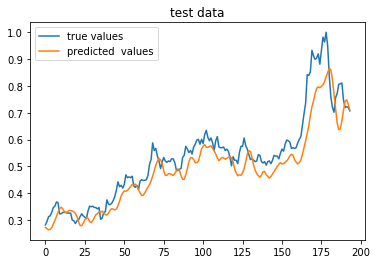

In [84]:
predicted_test = model.predict(xtest)
plt.plot(ytest, label='true values')
plt.plot(predicted_test, label='predicted  values')
plt.legend()
plt.title('test data')
plt.show()

In [85]:
ytest
label = np.zeros(len(ytest))
label[0] = 0
for i in range(1,len(ytest)):
    
    if ytest[i] >= ytest[i-1]:
        label[i] = 1
    else: label[i] = 0



In [86]:
predicted_test
label_pred = np.zeros(len(predicted_test))
label_pred[0] = 0
for i in range(1,len(predicted_test)):
    
    if predicted_test[i] >= predicted_test[i-1]:
        label_pred[i] = 1
    else: label_pred[i] = 0
